In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
from torchvision import models, transforms

#下準備（科目が変わらなければ一度実行すればOK）

subject_list = ["上皮","筋","神経","骨軟骨","血液","胃","肺","腸","肝膵臓","歯心臓大動脈","下垂体副腎","口唇舌唾液腺","男性生殖器","女性生殖器","眼","皮膚","脾臓リンパ","腎"]
subject_dict = {}
i = 0
for subject in subject_list:
  subject_dict[subject] = i
  i += 1


In [2]:
subject_dict

{'上皮': 0,
 '筋': 1,
 '神経': 2,
 '骨軟骨': 3,
 '血液': 4,
 '胃': 5,
 '肺': 6,
 '腸': 7,
 '肝膵臓': 8,
 '歯心臓大動脈': 9,
 '下垂体副腎': 10,
 '口唇舌唾液腺': 11,
 '男性生殖器': 12,
 '女性生殖器': 13,
 '眼': 14,
 '皮膚': 15,
 '脾臓リンパ': 16,
 '腎': 17}

In [3]:
#one_hot化へ

#a：本試験 b：追試験
test_dict = {
    "a_2011":["筋","神経","肺","歯心臓大動脈"],
    "a_2012":["上皮","筋","神経","腸","肝膵臓","下垂体副腎","女性生殖器","皮膚"],
    "b_2012":["上皮","筋","神経","腸","肝膵臓","下垂体副腎","男性生殖器","眼"],
    "a_2013":["上皮","筋","神経","骨軟骨","肺","肝膵臓"],
    "b_2013":["上皮","筋","神経","腸","肝膵臓","下垂体副腎","男性生殖器","眼"],
    "a_2014":["上皮","神経","歯心臓大動脈","下垂体副腎","腎"],
    "b_2014":["筋","神経","骨軟骨","腸","口唇舌唾液腺","皮膚"],
    "a_2015":["神経","腸","下垂体副腎","眼","腎"],
    "b_2015":["上皮","神経","腸","肝膵臓","下垂体副腎","腎"],
    "a_2016":["神経","骨軟骨","血液","胃"],
    "b_2016":["神経","肺","腸"],
    "a_2017":["神経","肺","眼"],
    "b_2017":["上皮","筋","神経","下垂体副腎","腎"],
    "a_2018":["神経","骨軟骨","女性生殖器","脾臓リンパ"],
    "b_2018":["神経","骨軟骨","女性生殖器","脾臓リンパ","腎"],
    "a_2019":["神経","肺","腸","口唇舌唾液腺","女性生殖器","脾臓リンパ","腎"],
    "b_2019":["筋","神経","胃","歯心臓大動脈","口唇舌唾液腺","眼","脾臓リンパ","腎"],
    "a_2020":["神経","肺","肝膵臓","下垂体副腎","皮膚","腎"],
    "b_2020":["神経","血液","肺","腸","下垂体副腎","眼","皮膚"],
    "a_2021":["神経","肺","眼"]
}

# input_list = {}
test_list = ["a","b"]

input_list = []

for year in range(2012,2021):
  for character in test_list:
    print(character)
    input_list.append(f"{character}_{year}")

print(input_list)

input_list.append("a_2021")
input_list.append("a_2011")

print(input_list)

test_years = []
test_per_year = []
test_per_year_onehot = []
inputs = []

for year in input_list: #a_2014

  print(year)

  test_per_year.append(test_dict[year]) #["肺", ...] (len=17)

  print(test_per_year)

  for test in test_per_year[0]: #["肺"]

    print(test)

    print(subject_dict[test])

    test_per_year_onehot.append(subject_dict[test]) #[0]
  
  inputs.append(test_per_year_onehot)

  test_per_year = []

  test_per_year_onehot = []


a
b
a
b
a
b
a
b
a
b
a
b
a
b
a
b
a
b
['a_2012', 'b_2012', 'a_2013', 'b_2013', 'a_2014', 'b_2014', 'a_2015', 'b_2015', 'a_2016', 'b_2016', 'a_2017', 'b_2017', 'a_2018', 'b_2018', 'a_2019', 'b_2019', 'a_2020', 'b_2020']
['a_2012', 'b_2012', 'a_2013', 'b_2013', 'a_2014', 'b_2014', 'a_2015', 'b_2015', 'a_2016', 'b_2016', 'a_2017', 'b_2017', 'a_2018', 'b_2018', 'a_2019', 'b_2019', 'a_2020', 'b_2020', 'a_2021', 'a_2011']
a_2012
[['上皮', '筋', '神経', '腸', '肝膵臓', '下垂体副腎', '女性生殖器', '皮膚']]
上皮
0
筋
1
神経
2
腸
7
肝膵臓
8
下垂体副腎
10
女性生殖器
13
皮膚
15
b_2012
[['上皮', '筋', '神経', '腸', '肝膵臓', '下垂体副腎', '男性生殖器', '眼']]
上皮
0
筋
1
神経
2
腸
7
肝膵臓
8
下垂体副腎
10
男性生殖器
12
眼
14
a_2013
[['上皮', '筋', '神経', '骨軟骨', '肺', '肝膵臓']]
上皮
0
筋
1
神経
2
骨軟骨
3
肺
6
肝膵臓
8
b_2013
[['上皮', '筋', '神経', '腸', '肝膵臓', '下垂体副腎', '男性生殖器', '眼']]
上皮
0
筋
1
神経
2
腸
7
肝膵臓
8
下垂体副腎
10
男性生殖器
12
眼
14
a_2014
[['上皮', '神経', '歯心臓大動脈', '下垂体副腎', '腎']]
上皮
0
神経
2
歯心臓大動脈
9
下垂体副腎
10
腎
17
b_2014
[['筋', '神経', '骨軟骨', '腸', '口唇舌唾液腺', '皮膚']]
筋
1
神経
2
骨軟骨
3
腸
7
口唇舌唾液腺
11
皮膚
15
a_2015
[['神経',

In [4]:
inputs

[[0, 1, 2, 7, 8, 10, 13, 15],
 [0, 1, 2, 7, 8, 10, 12, 14],
 [0, 1, 2, 3, 6, 8],
 [0, 1, 2, 7, 8, 10, 12, 14],
 [0, 2, 9, 10, 17],
 [1, 2, 3, 7, 11, 15],
 [2, 7, 10, 14, 17],
 [0, 2, 7, 8, 10, 17],
 [2, 3, 4, 5],
 [2, 6, 7],
 [2, 6, 14],
 [0, 1, 2, 10, 17],
 [2, 3, 13, 16],
 [2, 3, 13, 16, 17],
 [2, 6, 7, 11, 13, 16, 17],
 [1, 2, 5, 9, 11, 14, 16, 17],
 [2, 6, 8, 10, 15, 17],
 [2, 4, 6, 7, 10, 14, 15],
 [2, 6, 14],
 [1, 2, 6, 9]]

In [ ]:
onehot_inputs = []

for tensor in inputs:

  onehot_year = []

  for num in range(len(subject_list)):

    if num in tensor:

      onehot_year.append(1)
    
    else:

      onehot_year.append(0)
  
  onehot_inputs.append(onehot_year)

In [ ]:
#onehot化したinputは古い順に並んでいます

#onehot_inputs = torch.tensor(onehot_inputs)
print(onehot_inputs)
print(len(onehot_inputs))

[[1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0], [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0], [1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1], [0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1], [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1

In [ ]:
#訓練dataと正解dataのセット
#4回分で1回を予測する

input_set = []
real_set = []

val_input_set = []
val_real_set = []

prediction_input = []


#0~19
for i in range(0,len(onehot_inputs)-5): #0~17
  input_set_3years = []
  input_set_3years.append(onehot_inputs[i])
  input_set_3years.append(onehot_inputs[i+1])
  input_set_3years.append(onehot_inputs[i+2]) #max19(2019_b)

  input_set.append(input_set_3years)
  real_set.append(onehot_inputs[i+3])

for i in range(14,17): #14~16
  val_input_3years = []
  val_input_3years.append(onehot_inputs[i])
  val_input_3years.append(onehot_inputs[i+1])
  val_input_3years.append(onehot_inputs[i+2])

  val_input_set.append(val_input_3years)
  val_real_set.append(onehot_inputs[i+3])

prediction_input.append(onehot_inputs[len(onehot_inputs)-3])
prediction_input.append(onehot_inputs[len(onehot_inputs)-2])
prediction_input.append(onehot_inputs[len(onehot_inputs)-1])

In [ ]:
#listをtensorにする
input_set = torch.tensor(input_set)
real_set = torch.tensor(real_set)

val_input_set = torch.tensor(val_input_set)
val_real_set = torch.tensor(val_real_set)

prediction_input = torch.tensor(prediction_input)

print(input_set)
print(real_set)

print(input_set.shape)
print(real_set.shape)

#pytorchモデルで扱えるようにfloat型にしておく
input_set = input_set.float()
real_set = real_set.float()

val_input_set = val_input_set.float()
val_real_set = val_real_set.float()

prediction_input = prediction_input.float()

tensor([[[1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0],
         [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0],
         [1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0],
         [1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0]],

        [[1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0],
         [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]],

        [[1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0],
         [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
         [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]],

        [[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
         [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]],

        [[0, 1,

In [ ]:
len(input_set) #2=data数
len(input_set[0]) #3=sequence
len(input_set[0][0]) #16=feature_size

18

In [ ]:
for input_data, real_data in zip(input_set, real_set):
  print(input_data[2])

tensor([1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.])
tensor([1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.])
tensor([0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.])
tensor([0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
tensor([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.])
tensor([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.])
tensor([0., 0., 1., 0., 0., 

In [ ]:
print(prediction_input)

tensor([[0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [ ]:
#model
#入力→LSTM→隠れ層→FC→sigmoid??cross entropy??
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        
        super(Net, self).__init__()
        self.seq_len = 3             #時系列の長さ
        self.feature_size = 18         #一つ当たりのinputのsize
        self.hidden_layer_size = 128   # 隠れ層のサイズ
        self.lstm_layers = 1           # LSTMのレイヤー数　(LSTMを何層重ねるか)
        
        self.lstm = nn.LSTM(self.feature_size, 
                            self.hidden_layer_size, 
                            num_layers = self.lstm_layers)
        
        self.fc = nn.Linear(self.hidden_layer_size, 18)
        
    def init_hidden_cell(self, batch_size): # LSTMの隠れ層 hidden と記憶セル cell を初期化
        hedden = torch.zeros(self.lstm_layers, batch_size, self.hidden_layer_size)
        cell = torch.zeros(self.lstm_layers, batch_size, self.hidden_layer_size)        
        return (hedden, cell)

    def forward(self, x):
        batch_size = 1
        
        self.hidden_cell = self.init_hidden_cell(batch_size)

        x = x.view(batch_size, self.seq_len, self.feature_size)  # (Batch, Cannel, Height, Width) -> (Batch, Height, Width) = (Batch, Seqence, Feature)
                                                                # 画像の Height を時系列のSequenceに、Width を特徴量の次元としてLSTMに入力する
        x = x.permute(1, 0, 2)                                   # (Batch, Seqence, Feature) -> (Seqence , Batch, Feature)
        
        lstm_out, (h_n, c_n) = self.lstm(x, self.hidden_cell)    # LSTMの入力データのShapeは(Seqence, Batch, Feature)
                                                                 # (h_n) のShapeは (num_layers, batch, hidden_size)
        x = h_n[-1,:,:]                                          # lstm_layersの最後のレイヤーを取り出す  (B, h)
        x = self.fc(x)

        #x = F.softmax(x, dim=1)
        
        return x

In [ ]:
#train func
import time

def train_model(model, input_set, output_set, num_epochs, lr, loss_epoch_list, loss_list, loss_dict):

    #GPU使えるか確認
    #device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    #print('使用デバイス：', device)

    #損失関数
    criterion = nn.MSELoss()

    mini_batch_size = 1

    #model.to(device)

    #train mode

    torch.backends.cudnn.benchmark = True

    # num_train_imgs = len(dataloader.dataset)
    # print(num_train_imgs)
    # batch_size = dataloader.batch_size

    #最適化手法
    #optimizer = optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=0)
    optimizer.zero_grad()

    #表示
    #input_list = []
    output_list = []
    phase_list = ["train","eval"]

    for epoch in range(num_epochs):

        #開始時刻の保存
        t_epoch_start = time.time()
        epoch_loss = 0.0

        print('-------------------')
        print('Epoch {}/{}'.format(epoch, num_epochs))
        print('-------------------')
        

        for phase in phase_list:

            print(f'{phase}')

            if phase == "train":
              model.train()

            else:
              model.eval()

            for input_data, real_data in zip(input_set, real_set):
            
                #input_data = input_data.to(device)

                #print('input image:',images.shape)

                # print(input_data.shape)
                # print(len(input_data))
                # print(len(input_data[0]))

                #print(input_data)

                outputs = model(input_data)#.to(device)

                #from IPython.core.debugger import Pdb; Pdb().set_trace()    

                #print(input_data.shape, "/", outputs.shape)


              
                # 誤差を計算
                loss = 0.0

                #print("inputs:",input_data[0])

                #print("outputs:",outputs[0])

                '''
                for i in range(len(input_data[0])):
                  # print(outputs[0][i])
                  # print(real_data[i])

                  if outputs[0][i]-real_data[i] >= 0:

                    loss += (outputs[0][i]-real_data[i])**2
                  
                  else:

                    loss += (outputs[0][i]-real_data[i])**2*2

                  #loss += (outputs[0][i]-real_data[i])**2/2
                  #print("loss:",loss)

                loss = loss/len(real_data)
                print("mean loss:",loss)
                '''

                loss = criterion(outputs, real_data)
                #print(loss)
                #print(loss)

                #loss.requires_grad = True

                #逆伝播
                loss.backward()
                #stepってなんだ？
                optimizer.step()

                loss_epoch_list.append(loss)

                #print(images.shape)
                #print(outputs.shape)

                output_list.append(outputs)
                

                #print("one input done")

            #------------
            #3.記録
            #------------

            loss_dict[phase].append(torch.mean(torch.stack(loss_epoch_list)))
            print(f"{phase}",torch.mean(torch.stack(loss_epoch_list)))
            

            t_epoch_finish = time.time()
            print('---------------')
            print('epoch{} || Epoch_loss:{:.4f}'.format(
                epoch, torch.mean(torch.stack(loss_epoch_list))))

            print('timer: {:.4f} sec.'.format(t_epoch_finish - t_epoch_start))
            t_epoch_start = time.time()

            loss_epoch_list = []

            #epoch毎の画像表示
            #torchvision.utils.make_gridはlistで渡す場合はbatchの次元消さないといけないっぽい
            # input_images = torchvision.utils.make_grid(input_list,nrow=5,)
            # output_images = torchvision.utils.make_grid(output_list)

            # input_images = input_images.detach().cpu().numpy()
            # output_images = output_images.detach().cpu().numpy()

            # plt.imshow(input_images.transpose(1,2,0))
            # plt.show()

            # plt.imshow(output_images.transpose(1,2,0))
            # plt.show()

            #input_list = []
            #output_list = []

        # weight_path = '/content/drive/MyDrive/自分用/BMI/BMI_weight'

        # torch.save(model.state_dict(), weight_path + "/weight_batch_1.pth")
        # print("model was saved as:", weight_path + "/weight_batch_1.pth")

        #model.eval()

    return model, loss_dict, output_list

In [ ]:
#train
model = Net()

loss_dict = {"train":[], "eval":[]}

loss_list = []
loss_epoch_list = []

num_epoch1 = 5

num_epoch2 = 10

num_epoch3 = 20

epoch_list = [num_epoch1, num_epoch2, num_epoch3]

model1, loss_dict1, output_list1 = train_model(model, input_set, real_set, 1000, 1e-4, loss_epoch_list, loss_list, loss_dict)

'''
model = Net()
model2, loss_dict2, output_list2 = train_model(model, input_set, real_set, num_epoch2, 1e-4, loss_epoch_list, loss_list, loss_dict)

model = Net()
model3, loss_dict3, output_list3 = train_model(model, input_set, real_set, num_epoch3, 1e-4, loss_epoch_list, loss_list, loss_dict)
'''

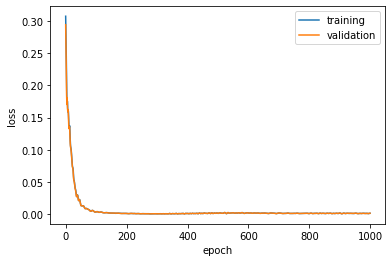

In [ ]:
#train/val plot
import matplotlib.pyplot as plt

plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(loss_dict["train"], label="training")
plt.plot(loss_dict["eval"], label="validation")
plt.legend()
plt.show()

In [ ]:
prediction_list = model1(prediction_input)
print(prediction_list)

tensor([[ 0.4209, -0.1154, -0.8460, -2.2530, -1.1008,  0.0300,  2.4938, -1.3657,
         -1.6435, -2.0108, -1.7159,  0.1454, -1.7976,  0.5547,  2.4140, -1.3899,
         -1.9312, -1.7461]], grad_fn=<AddmmBackward0>)


In [ ]:
prediction_dict = {}
i = 0

for subject in subject_list:
  prediction_dict[subject] = prediction_list[0][i].item()
  i += 1

In [ ]:
print(prediction_dict)

{'上皮': 0.42089009284973145, '筋': -0.11540299654006958, '神経': -0.84604811668396, '骨軟骨': -2.2529664039611816, '血液': -1.1007792949676514, '胃': 0.03001733124256134, '肺': 2.4937937259674072, '腸': -1.365661859512329, '肝膵臓': -1.6434636116027832, '歯心臓大動脈': -2.0108442306518555, '下垂体副腎': -1.7158606052398682, '口唇舌唾液腺': 0.14539223909378052, '男性生殖器': -1.7976253032684326, '女性生殖器': 0.5546892881393433, '眼': 2.414003372192383, '皮膚': -1.3899492025375366, '脾臓リンパ': -1.931234359741211, '腎': -1.7460711002349854}


In [ ]:
prediction_list = prediction_list.detach().numpy()
print(prediction_list[0])

[ 0.4208901  -0.115403   -0.8460481  -2.2529664  -1.1007793   0.03001733
  2.4937937  -1.3656619  -1.6434636  -2.0108442  -1.7158606   0.14539224
 -1.7976253   0.5546893   2.4140034  -1.3899492  -1.9312344  -1.7460711 ]


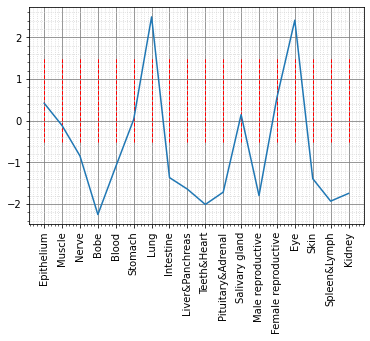

In [ ]:
subject_list_english = ["Epithelium","Muscle","Nerve","Bobe","Blood","Stomach","Lung","Intestine","Liver&Panchreas","Teeth&Heart","Pituitary&Adrenal","Salivary gland","Male reproductive","Female reproductive","Eye","Skin","Spleen&Lymph","Kidney"]

plt.plot(list(range(len(prediction_list[0]))),prediction_list[0], label="出題される可能性")
plt.xticks(list(range(len(prediction_list[0]))),subject_list_english,rotation=90)

# x軸に補助目盛線を設定
plt.vlines(list(range(len(prediction_list[0]))), -0.5, 1.5, colors='red', linestyle='dashed', linewidth=1)

plt.minorticks_on()
plt.grid(which="major", color="gray", linestyle="solid")
plt.grid(which="minor", color="lightgray", linestyle="dotted")

plt.show()

In [ ]:
input_set = input_set.float()
net = Net(input_set[0])
out = net.forward(input_set[0])

In [ ]:
onehot_inputs = onehot_inputs.float()

In [ ]:
net = Net(onehot_inputs)

In [ ]:
type(onehot_inputs)

torch.Tensor

In [ ]:
out = net.forward(onehot_inputs)

In [ ]:
out

tensor([[-0.0374, -0.0823, -0.0621,  0.0425, -0.0081,  0.0433, -0.0963,  0.0542,
         -0.0531, -0.1054,  0.0243,  0.0034, -0.1007, -0.0059, -0.0999]],
       grad_fn=<AddmmBackward0>)

In [ ]:
subject_tensor = []

for subject in subject_set:
  subject = torch.tensor(subject)
  subject_tensor.append(subject)
  print(subject)

tensor([0, 0, 1, 0, 0])
tensor([1, 0, 0, 0, 0])
tensor([0, 1, 0, 0, 0])


In [ ]:
subject_tensor

[tensor([0, 0, 1, 0, 0]), tensor([1, 0, 0, 0, 0]), tensor([0, 1, 0, 0, 0])]

In [ ]:
#0/1表現にした方が良さそう
eye = [0,0,1,0,0]
lung = [1,0,0,0,0]
ear = [0,1,0,0,0]

subject_dict = 

subject_set = [eye,lung,ear]
subject_character = 

In [ ]:
eye = subject_tensor[0]
len(eye)

5

In [ ]:
for i in range(3):
  subject